In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import torch

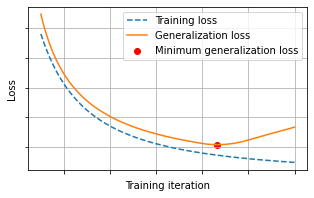

In [3]:
x1 = np.linspace(1, 10, 900)
x2 = np.linspace(10, 14, 400)
x = np.hstack((x1,x2))
eps = 1e-8
training_loss1 = 5/((x1+eps)**1.5)
training_loss2 = 5/((x2+eps)**1.5)
training_loss = np.hstack((training_loss1, training_loss2))

lamb = 0.3
generalization_loss1 = 2/(x1+eps)
generalization_loss2 = 2/(x1[-1]+eps) - lamb * np.sqrt(x2[0]+eps) + lamb*np.sqrt(x2+eps)
generalization_loss = pd.Series(np.hstack((generalization_loss1, generalization_loss2))).rolling(200).mean().bfill().values

fig, ax = plt.subplots(figsize=(5,3))

ax.plot(x[200:], training_loss[200:],"--", label="Training loss")
ax.plot(x[200:], generalization_loss[200:], label="Generalization loss")
idx = np.argmin(generalization_loss)
ax.scatter(x[idx], generalization_loss[idx], c='r', label="Minimum generalization loss")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel("Training iteration")
ax.set_ylabel("Loss")
ax.grid()

ax.legend()
fig.savefig("plots/Need for early stopping.pdf",format="pdf")
plt.show()

In [4]:
a_train = np.array([0.389, 1, 1.524, 9.510])
T_train = np.array([87.77, 365.25, 686.95, 10759.2])

a_test = np.array([0.724, 5.20])
T_test = np.array([224.70, 4332.62])

In [5]:
Xtrain1 = a_train**3
ytrain1 = T_train**2
Xtest1 = a_test**3
ytest1 = T_test**2

In [6]:
beta1 = 1/(np.matmul(Xtrain1.T, Xtrain1)) * np.matmul(Xtrain1.T, ytrain1)
print(beta1)
print("MSE1: ", np.mean((ytest1-beta1*Xtest1)**2))

134591.7176578138
MSE1:  11716330051.147892


In [7]:
print((Xtest1*beta1-ytest1)**2)

[3.45658972e+05 2.34323144e+10]


In [8]:
Xtrain2 = np.column_stack((np.ones_like(a_train), a_train, a_train**2, a_train**3))
ytrain2 = T_train**2
Xtest2 = np.column_stack((np.ones_like(a_test), a_test, a_test**2, a_test**3))
ytest2 = T_test**2

In [9]:
print(Xtrain2)
print(ytrain2)
print(Xtest2)
print(ytest2)

[[1.00000000e+00 3.89000000e-01 1.51321000e-01 5.88638690e-02]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.52400000e+00 2.32257600e+00 3.53960582e+00]
 [1.00000000e+00 9.51000000e+00 9.04401000e+01 8.60085351e+02]]
[7.70357290e+03 1.33407562e+05 4.71900303e+05 1.15760385e+08]
[[  1.           0.724        0.524176     0.37950342]
 [  1.           5.2         27.04       140.608     ]]
[   50490.09   18771596.0644]


In [10]:
np.random.seed(29)

x = np.linspace(0,5,6)
x2 = np.linspace(0.5,4.5,5)
y1=5+2*x-0.5*x**2 + 1.2*np.random.standard_normal(len(x))
y2=5+2*x2-0.5*x2**2 + 1.2*np.random.standard_normal(len(x2))

In [11]:
X1 = np.column_stack((np.ones_like(x),x))
X2 = np.column_stack((np.ones_like(x),x,x**2))
X6 = np.column_stack((np.ones_like(x),x,x**2,x**3,x**4,x**5,x**6))
Xtest1 = np.column_stack((np.ones_like(x2),x2))
Xtest2 = np.column_stack((np.ones_like(x2),x2,x2**2))
Xtest6 = np.column_stack((np.ones_like(x2),x2,x2**2,x2**3,x2**4,x2**5,x2**6))

coef1 = np.linalg.solve(np.matmul(X1.T,X1), np.matmul(X1.T,y1))
coef2 = np.linalg.solve(np.matmul(X2.T,X2), np.matmul(X2.T,y1))
coef6 = np.linalg.solve(np.matmul(X6.T,X6), np.matmul(X6.T,y1))

x_pred = np.linspace(0,5,400)
x_pred1 = np.column_stack((np.ones_like(x_pred),x_pred))
x_pred2 = np.column_stack((np.ones_like(x_pred),x_pred,x_pred**2))
x_pred6 = np.column_stack((np.ones_like(x_pred),x_pred,x_pred**2,x_pred**3,x_pred**4,x_pred**5,x_pred**6))
y_pred1 = np.matmul(x_pred1, coef1)
y_pred2 = np.matmul(x_pred2, coef2)
y_pred6 = np.matmul(x_pred6, coef6)
y_train1 = np.matmul(X1, coef1)
y_train2 = np.matmul(X2, coef2)
y_train6 = np.matmul(X6, coef6)
y_test1 = np.matmul(Xtest1, coef1)
y_test2 = np.matmul(Xtest2, coef2)
y_test6 = np.matmul(Xtest6, coef6)


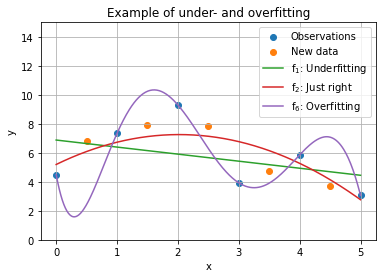

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(x,y1,label="Observations")
ax.scatter(x2,y2,label="New data")
ax.plot(x_pred, y_pred1, label="f$_1$: Underfitting", color=plt.cm.tab10(2))
ax.plot(x_pred, y_pred2, label="f$_2$: Just right", color=plt.cm.tab10(3))
ax.plot(x_pred, y_pred6, label="f$_6$: Overfitting", color=plt.cm.tab10(4))
ax.legend(loc=1)
ax.set_ylim([0,15])
ax.grid()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Example of under- and overfitting")

fig.savefig("plots/Under- and overfitting.pdf",format="pdf")

In [13]:
print(coef1)
print(coef2)
print(coef6)

[ 6.88181058 -0.48614487]
[ 5.19556868  2.04321799 -0.50587257]
[  4.49902145 -22.36342821  52.18773792 -36.58717358  11.02530607
  -1.48684267   0.07261753]


In [14]:
print("MSE1:", np.mean((y1 - y_train1)**2))
print("MSE2:", np.mean((y1 - y_train2)**2))
print("MSE6:", np.mean((y1 - y_train6)**2))
print("MSE1:", np.mean((y2 - y_test1)**2))
print("MSE2:", np.mean((y2 - y_test2)**2))
print("MSE6:", np.mean((y2 - y_test6)**2))

MSE1: 3.8490058967587206
MSE2: 2.256695305837464
MSE6: 1.0945629834755769e-19
MSE1: 1.8175966203312879
MSE2: 0.7646025589124401
MSE6: 7.748745608518421


In [15]:
lambda_ridge = np.logspace(-2,2,300)
MSE_train_ridge = np.zeros(len(lambda_ridge))
MSE_test_ridge = np.zeros(len(lambda_ridge))
y_pred_ridge = [None] * len(lambda_ridge)
coef_norm_ridge = np.zeros(len(lambda_ridge))

X6 = np.column_stack((np.ones_like(x),x,x**2,x**3,x**4,x**5,x**6))
Xtest6 = np.column_stack((np.ones_like(x2),x2,x2**2,x2**3,x2**4,x2**5,x2**6))
x_pred = np.linspace(0,5,400)
x_pred6 = np.column_stack((np.ones_like(x_pred),x_pred,x_pred**2,x_pred**3,x_pred**4,x_pred**5,x_pred**6))

for i,lamb in enumerate(lambda_ridge):
    coef_ridge = np.linalg.solve(np.matmul(X6.T,X6) + lamb*np.identity(len(X6.T)), np.matmul(X6.T,y1))

    y_pred_ridge[i] = np.matmul(x_pred6, coef_ridge)
    MSE_train_ridge[i] = np.mean((np.matmul(X6, coef_ridge) - y1)**2)
    MSE_test_ridge[i] = np.mean((np.matmul(Xtest6, coef_ridge) - y2)**2)
    coef_norm_ridge[i] = np.sum(coef_ridge**2)


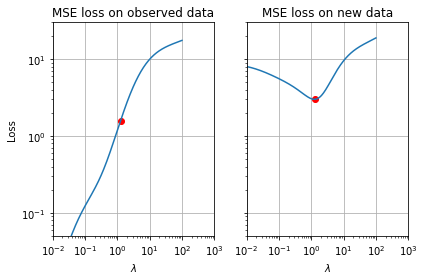

In [16]:
fig, axes = plt.subplots(1,2,figsize=(6,4), sharey=True, sharex=True)

ax = axes[0]
ax.plot(lambda_ridge, MSE_train_ridge)
ax.scatter(lambda_ridge[np.argmin(MSE_test_ridge)], MSE_train_ridge[np.argmin(MSE_test_ridge)],color="r")
ax.set_title("MSE loss on observed data")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Loss")
ax.set_xlim([1e-2, 1e3])
ax.set_ylim([5e-2, 3e1])
ax.grid()

ax = axes[1]
ax.plot(lambda_ridge, MSE_test_ridge)
ax.scatter(lambda_ridge[np.argmin(MSE_test_ridge)], MSE_test_ridge[np.argmin(MSE_test_ridge)],color="r")
ax.set_title("MSE loss on new data")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$\lambda$")
#ax.set_ylabel("Loss")
ax.grid()

fig.tight_layout()

fig.savefig("plots/Ridge regression example.pdf",format="pdf")
plt.show()

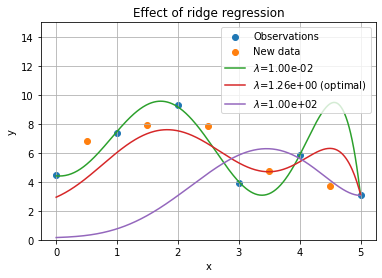

In [17]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.scatter(x,y1,label="Observations")
ax.scatter(x2,y2,label="New data")
ax.plot(x_pred, y_pred_ridge[0], label="$\lambda$={:.2e}".format(lambda_ridge[0]), color=plt.cm.tab10(2))
ax.plot(x_pred, y_pred_ridge[np.argmin(MSE_test_ridge)], 
    label="$\lambda$={:.2e} (optimal)".format(lambda_ridge[np.argmin(MSE_test_ridge)]), color=plt.cm.tab10(3))
ax.plot(x_pred, y_pred_ridge[-1], label="$\lambda$={:.2e}".format(lambda_ridge[-1]), color=plt.cm.tab10(4))

ax.legend(loc=0)
ax.set_ylim([0,15])
ax.grid()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Effect of ridge regression")

fig.savefig("plots/Effect of ridge regression.pdf",format="pdf")

In [18]:
J = np.zeros((32,32))

for i in range(1, 28, 2):
	J[i,i+1] = 1

J[ 2, 1]  = 1
J[ 2, 9]  = 1
J[ 2, 11] = 1
J[ 2, 13] = 1

J[ 4, 3] = 1
J[ 4, 11] = 1

J[ 6, 5 ] = 1
J[ 6, 9 ] = 1
J[ 6, 11] = 1
J[ 6, 13] = 1

J[ 8, 7] = 1
J[ 4, 11] = 1

J[10,  1] = 1
J[10,  5] = 1
J[10,  9] = 1
J[10, 10] = 1
J[10, 13] = 1
J[10, 14] = 1
J[10, 15] = 1
J[10, 16] = 1

J[12, 1] = 1
J[12, 3] = 1
J[12, 5] = 1
J[12, 7] = 1
J[12, 11] = 1
J[12, 12] = 1

J[14, 1] = 1
J[14, 5] = 1
J[14, 9] = 1
J[14, 10] = 1
J[14, 13] = 1
J[14, 14] = 1
J[14, 15] = 1
J[14, 16] = 1
J[14, 21] = 1
J[14, 23] = 1

J[16, 13]= 1
J[16, 14]= 1
J[16, 15]= 1
J[16, 16]= 1

J[18, 17]= 1
J[18, 25]= 1

J[20, 19]= 1
J[20, 25]= 1

J[22, 13]= 1
J[22, 21]= 1

J[24, 13]= 1
J[24, 23]= 1

J[26, 17]= 1
J[26, 19]= 1
J[26, 25]= 1
J[26, 26]= 1

J[28, 17]= 1
J[28, 19]= 1
J[28, 27]= 1

J[29, 3]= 1
J[29, 13]= 1

J[30, 7]= 1
J[30, 13]= 1

J = J[1:,1:]

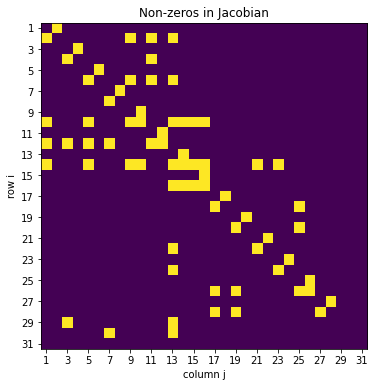

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.imshow(J)
ax.set_xticks([i for i in range(0,31,2)])
ax.set_xticklabels([i for i in range(1,32,2)])
ax.set_yticks([i for i in range(0,31,2)])
ax.set_yticklabels([i for i in range(1,32,2)])
ax.set_xlabel("column j")
ax.set_ylabel("row i")
ax.set_title('Non-zeros in Jacobian')

fig.savefig("plots/non-zeros in Jacobian.pdf", format="pdf")

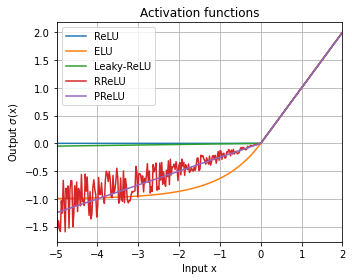

In [20]:
x = torch.linspace(-5, 2, 300)

relu = torch.nn.functional.relu(x).numpy()
elu = torch.nn.functional.elu(x).numpy()
leaky_relu = torch.nn.functional.leaky_relu(x).numpy()
rrelu = torch.nn.functional.rrelu(x, training=True).numpy()
prelu = torch.nn.functional.prelu(x, torch.tensor(0.25)).numpy()

fig, ax = plt.subplots(1,1,figsize=(5,4))

ax.plot(x, relu, label="ReLU")
ax.plot(x, elu, label="ELU")
ax.plot(x, leaky_relu, label="Leaky-ReLU")
ax.plot(x, rrelu, label="RReLU")
ax.plot(x, prelu, label="PReLU")
ax.set_xlim([-5, 2])
ax.grid()

ax.legend()

ax.set_xlabel("Input x")
ax.set_ylabel("Output $\sigma$(x)")
ax.set_title("Activation functions")

fig.tight_layout()

fig.savefig("plots/Activation functions.pdf", format="pdf")

In [21]:
ode_data = np.fromfile("/work1/s174505/Thesis/Data/ODE_simulation.bin").reshape(-1, 90)

In [22]:
position = ode_data[:50000, 0]/1000
u = ode_data[:50000, 4:34]*1000
irreg = ode_data[:50000, 50:58]*1000

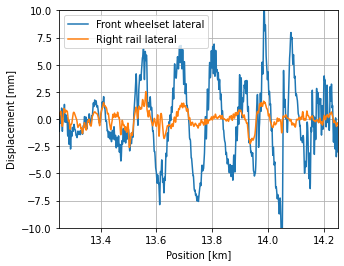

In [23]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

ax.plot(position, u[:,1], label="Front wheelset lateral")
ax.plot(position, irreg[:,1], label="Right rail lateral")

ax.set_xlim([13.25, 14.25])
ax.set_ylim([-10, 10])

ax.legend()

ax.set_ylabel("Displacement [mm]")
ax.set_xlabel("Position [km]")
ax.grid()

fig.savefig("plots/Simulation example.pdf", format="pdf", bbox_inches="tight")

In [24]:
position[28000]

14.010000900003526

In [15]:
ode_data[26800:28000, 1].mean()

81.52896842048037